## YOLOv5 모델 (PyTorch)

* https://github.com/ultralytics/yolov5
* https://www.ultralytics.com

### 모델 다운로드

In [ ]:
%cd /content
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

import torch
from IPython.display import Image, clear_output

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 15679, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 15679 (delta 1), reused 2 (delta 0), pack-reused 15672
Receiving objects: 100% (15679/15679), 14.39 MiB | 22.36 MiB/s, done.
Resolving deltas: 100% (10747/10747), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.5/586.5 kB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 23.1 MB/s eta 0:00:00


## 연기 탐지 모델

### 데이터셋 다운로드

* 연기 데이터셋: https://public.roboflow.com/object-detection/wildfire-smoke/

In [ ]:
%mkdir /content/yolov5/smoke
%cd /content/yolov5/smoke
!curl -L "https://public.roboflow.com/ds/syW0QlY8is?key=3XpT2yoxRM" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content/yolov5/smoke
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   3252      0 --:--:-- --:--:-- --:--:--  3252
100 27.6M  100 27.6M    0     0  16.1M      0  0:00:01  0:00:01 --:--:-- 21.6M
Archive:  roboflow.zip
 extracting: test/images/ck0rqdyeq4kxa08633xv2wqe1_jpeg.rf.30df6babe258cdc1d5a4e042262665e4.jpg  
 extracting: test/images/ck0qd918zic840701hnezgpgy_jpeg.rf.30de65aa3639b8a113db71a11bc2726c.jpg  
 extracting: test/images/ck0kfjen48qhj0701wjkosmel_jpeg.rf.49b365cc7135deee1332e6657401abc5.jpg  
 extracting: test/images/ck0t7cczuqxtt07212nj5eznh_jpeg.rf.1a9299c8658d89f6271dba2aeefe074d.jpg  
 extracting: test/images/ck0kn8y5y9y3507018k5p06ma_jpeg.rf.466b2fb63a73c0138cf75b3ddc71d490.jpg  
 extracting: test/images/ck0tzjni6sjt50863e6a6a8fl_jpeg.rf.46d343d22cd08c90668cc0d50bc52a2d.jpg  
 extracting: test/images/ck0tszlepw02k0721zr71djfj_

In [ ]:
from glob import glob

train_img_list = glob('/content/yolov5/smoke/train/images/*.jpg')
test_img_list = glob('/content/yolov5/smoke/test/images/*.jpg')
valid_img_list = glob('/content/yolov5/smoke/valid/images/*.jpg')

print(len(train_img_list), len(test_img_list), len(valid_img_list))

516 74 147


In [ ]:
import yaml

with open('/content/yolov5/smoke/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/yolov5/smoke/test.txt', 'w') as f:
  f.write('\w'.join(test_img_list) + '\n')

with open('/content/yolov5/smoke/val.txt', 'w') as f:
  f.write('\n'.join(valid_img_list) + '\n')

In [ ]:
%cat /content/yolov5/smoke/data.yaml

train: ../train/images
val: ../valid/images

nc: 1
names: ['smoke']

In [ ]:
%%writetemplate /content/yolov5/smoke/data.yaml

train: ./smoke/train/images
test: ./smoke/test/images 
val: ./smoke/valid/images

nc: 1
names: ['smoke']

In [ ]:
%cat /content/yolov5/smoke/data.yaml


train: ./smoke/train/images
test: ./smoke/test/images 
val: ./smoke/valid/images

nc: 1
names: ['smoke']


### 모델 구성

In [ ]:
import yaml

with open("/content/yolov5/smoke/data.yaml", 'r') as stream:
  num_classes = str(yaml.safe_load(stream)['nc'])

%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml


# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [ ]:
%cat /content/yolov5/models/custom_yolov5s.yaml



# Parameters
nc: 1  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, F

### 학습(Training)

* `img`: 입력 이미지 크기 정의
* `batch`: 배치 크기 결정
* `epochs`: 학습 기간 개수 정의
* `data`: yaml 파일 경로
* `cfg`: 모델 구성 지정
* `weights`: 가중치에 대한 경로 지정
* `name`: 결과 이름
* `nosave`: 최종 체크포인트만 저장
* `cache`: 빠른 학습을 위한 이미지 캐시

In [ ]:
%%time
%cd /content/yolov5
!python train.py --img 640 --batch 32 --epochs 100 --data ./smoke/data.yaml --cfg ./models/custom_yolov5s.yaml --weights '' --name smoke_results --cache

/content/yolov5
train: weights=, cfg=./models/custom_yolov5s.yaml, data=./smoke/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=smoke_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0,

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
!ls runs/train/smoke_results

confusion_matrix.png				     results.png
events.out.tfevents.1684378161.840ba616b0c7.45949.0  train_batch0.jpg
F1_curve.png					     train_batch1.jpg
hyp.yaml					     train_batch2.jpg
labels_correlogram.jpg				     val_batch0_labels.jpg
labels.jpg					     val_batch0_pred.jpg
opt.yaml					     val_batch1_labels.jpg
P_curve.png					     val_batch1_pred.jpg
PR_curve.png					     val_batch2_labels.jpg
R_curve.png					     val_batch2_pred.jpg
results.csv					     weights


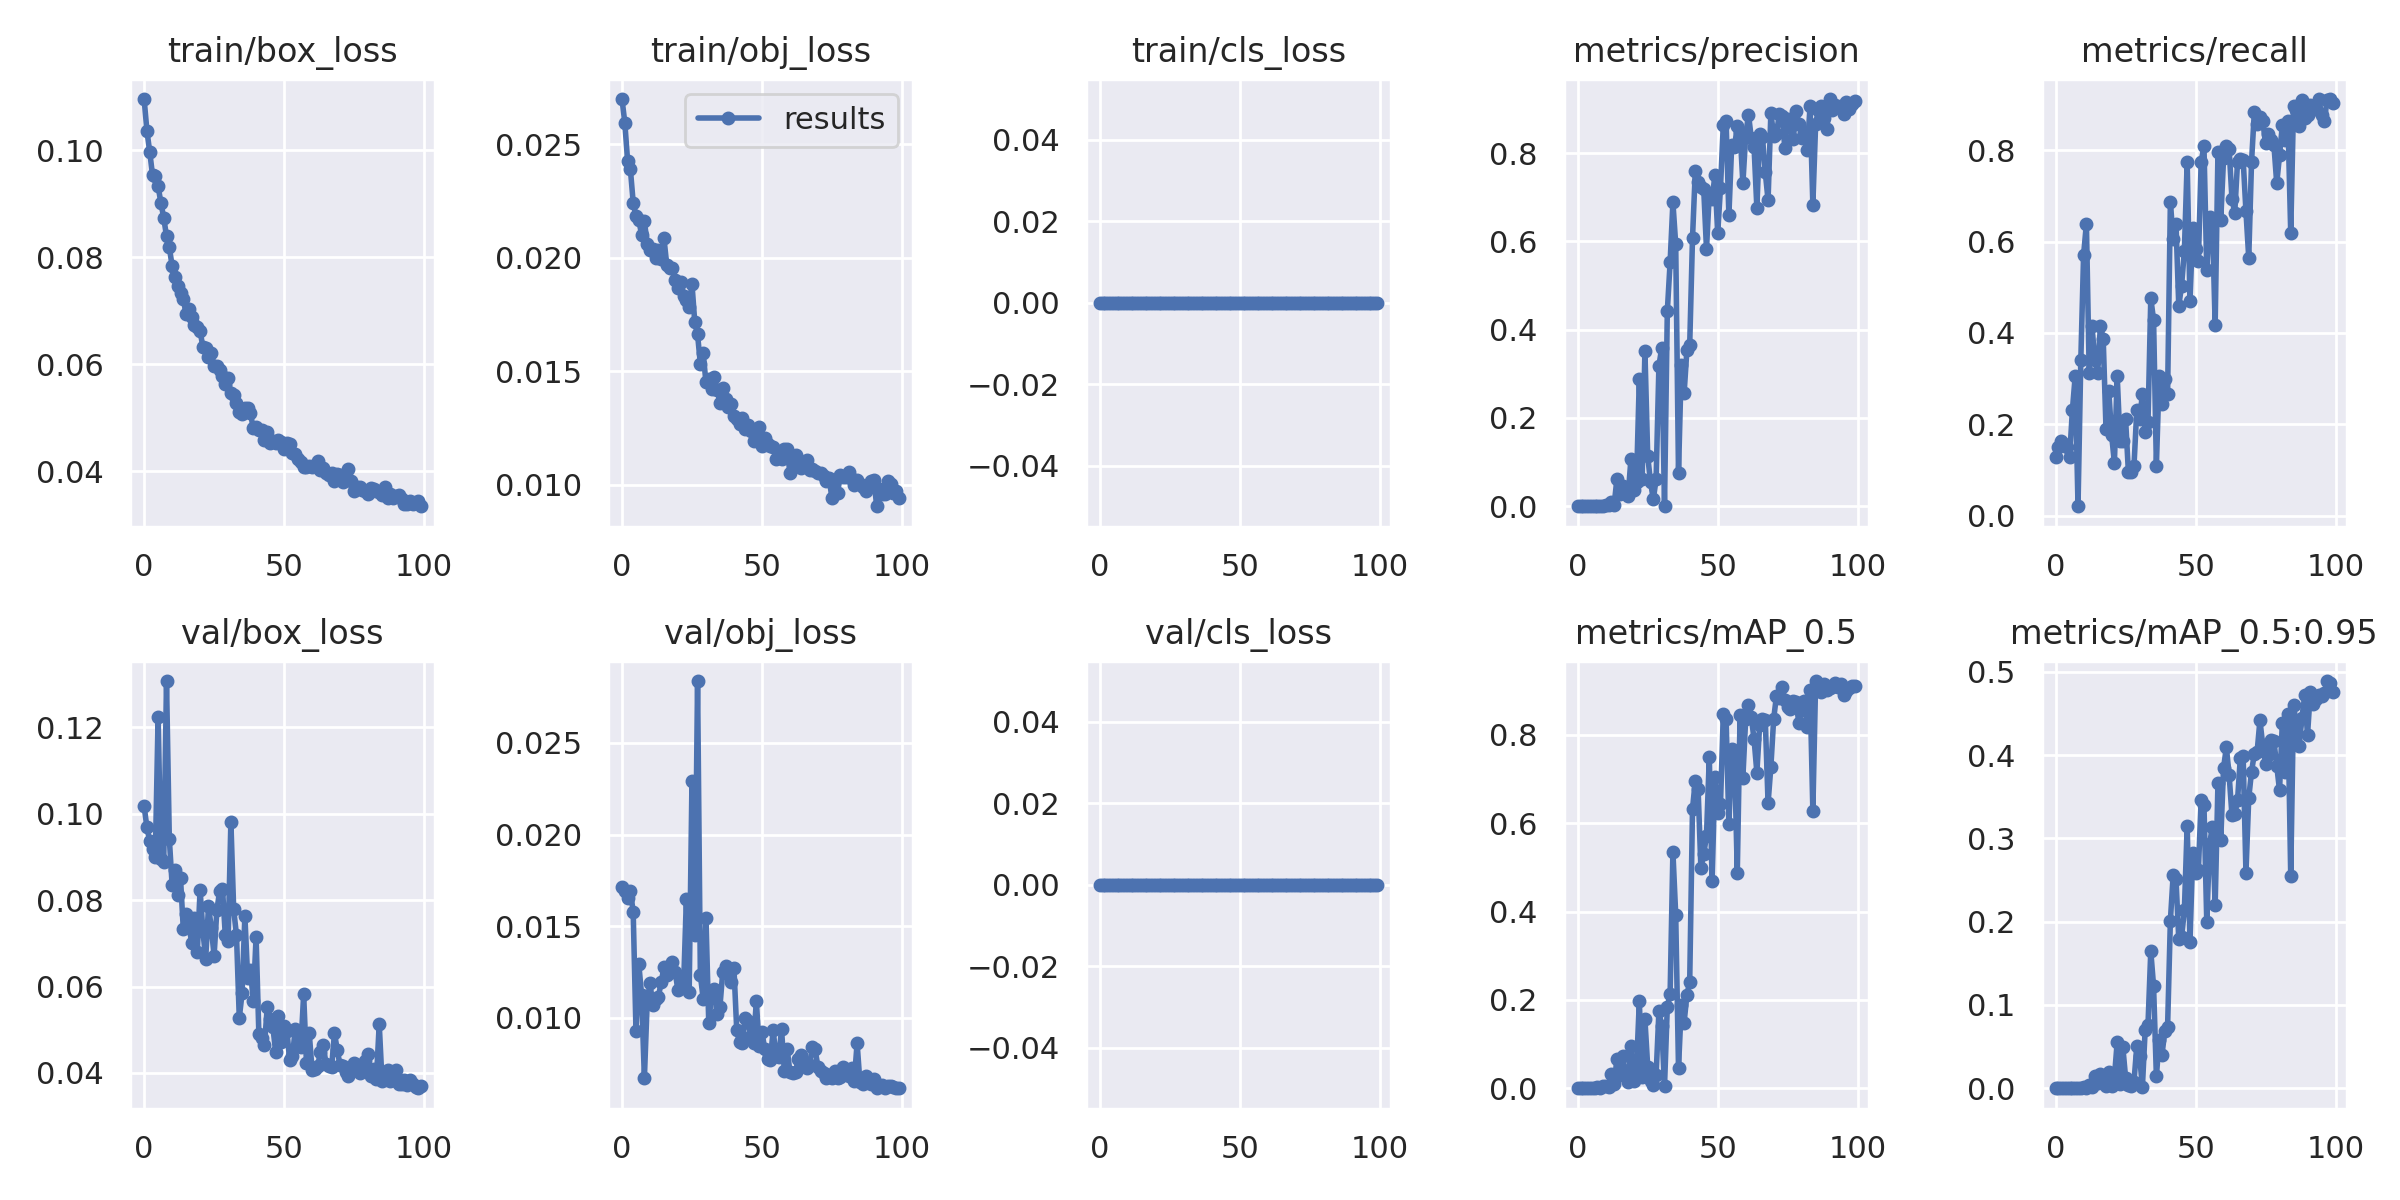

In [ ]:
Image(filename='runs/train/smoke_results/results.png', width=1000)

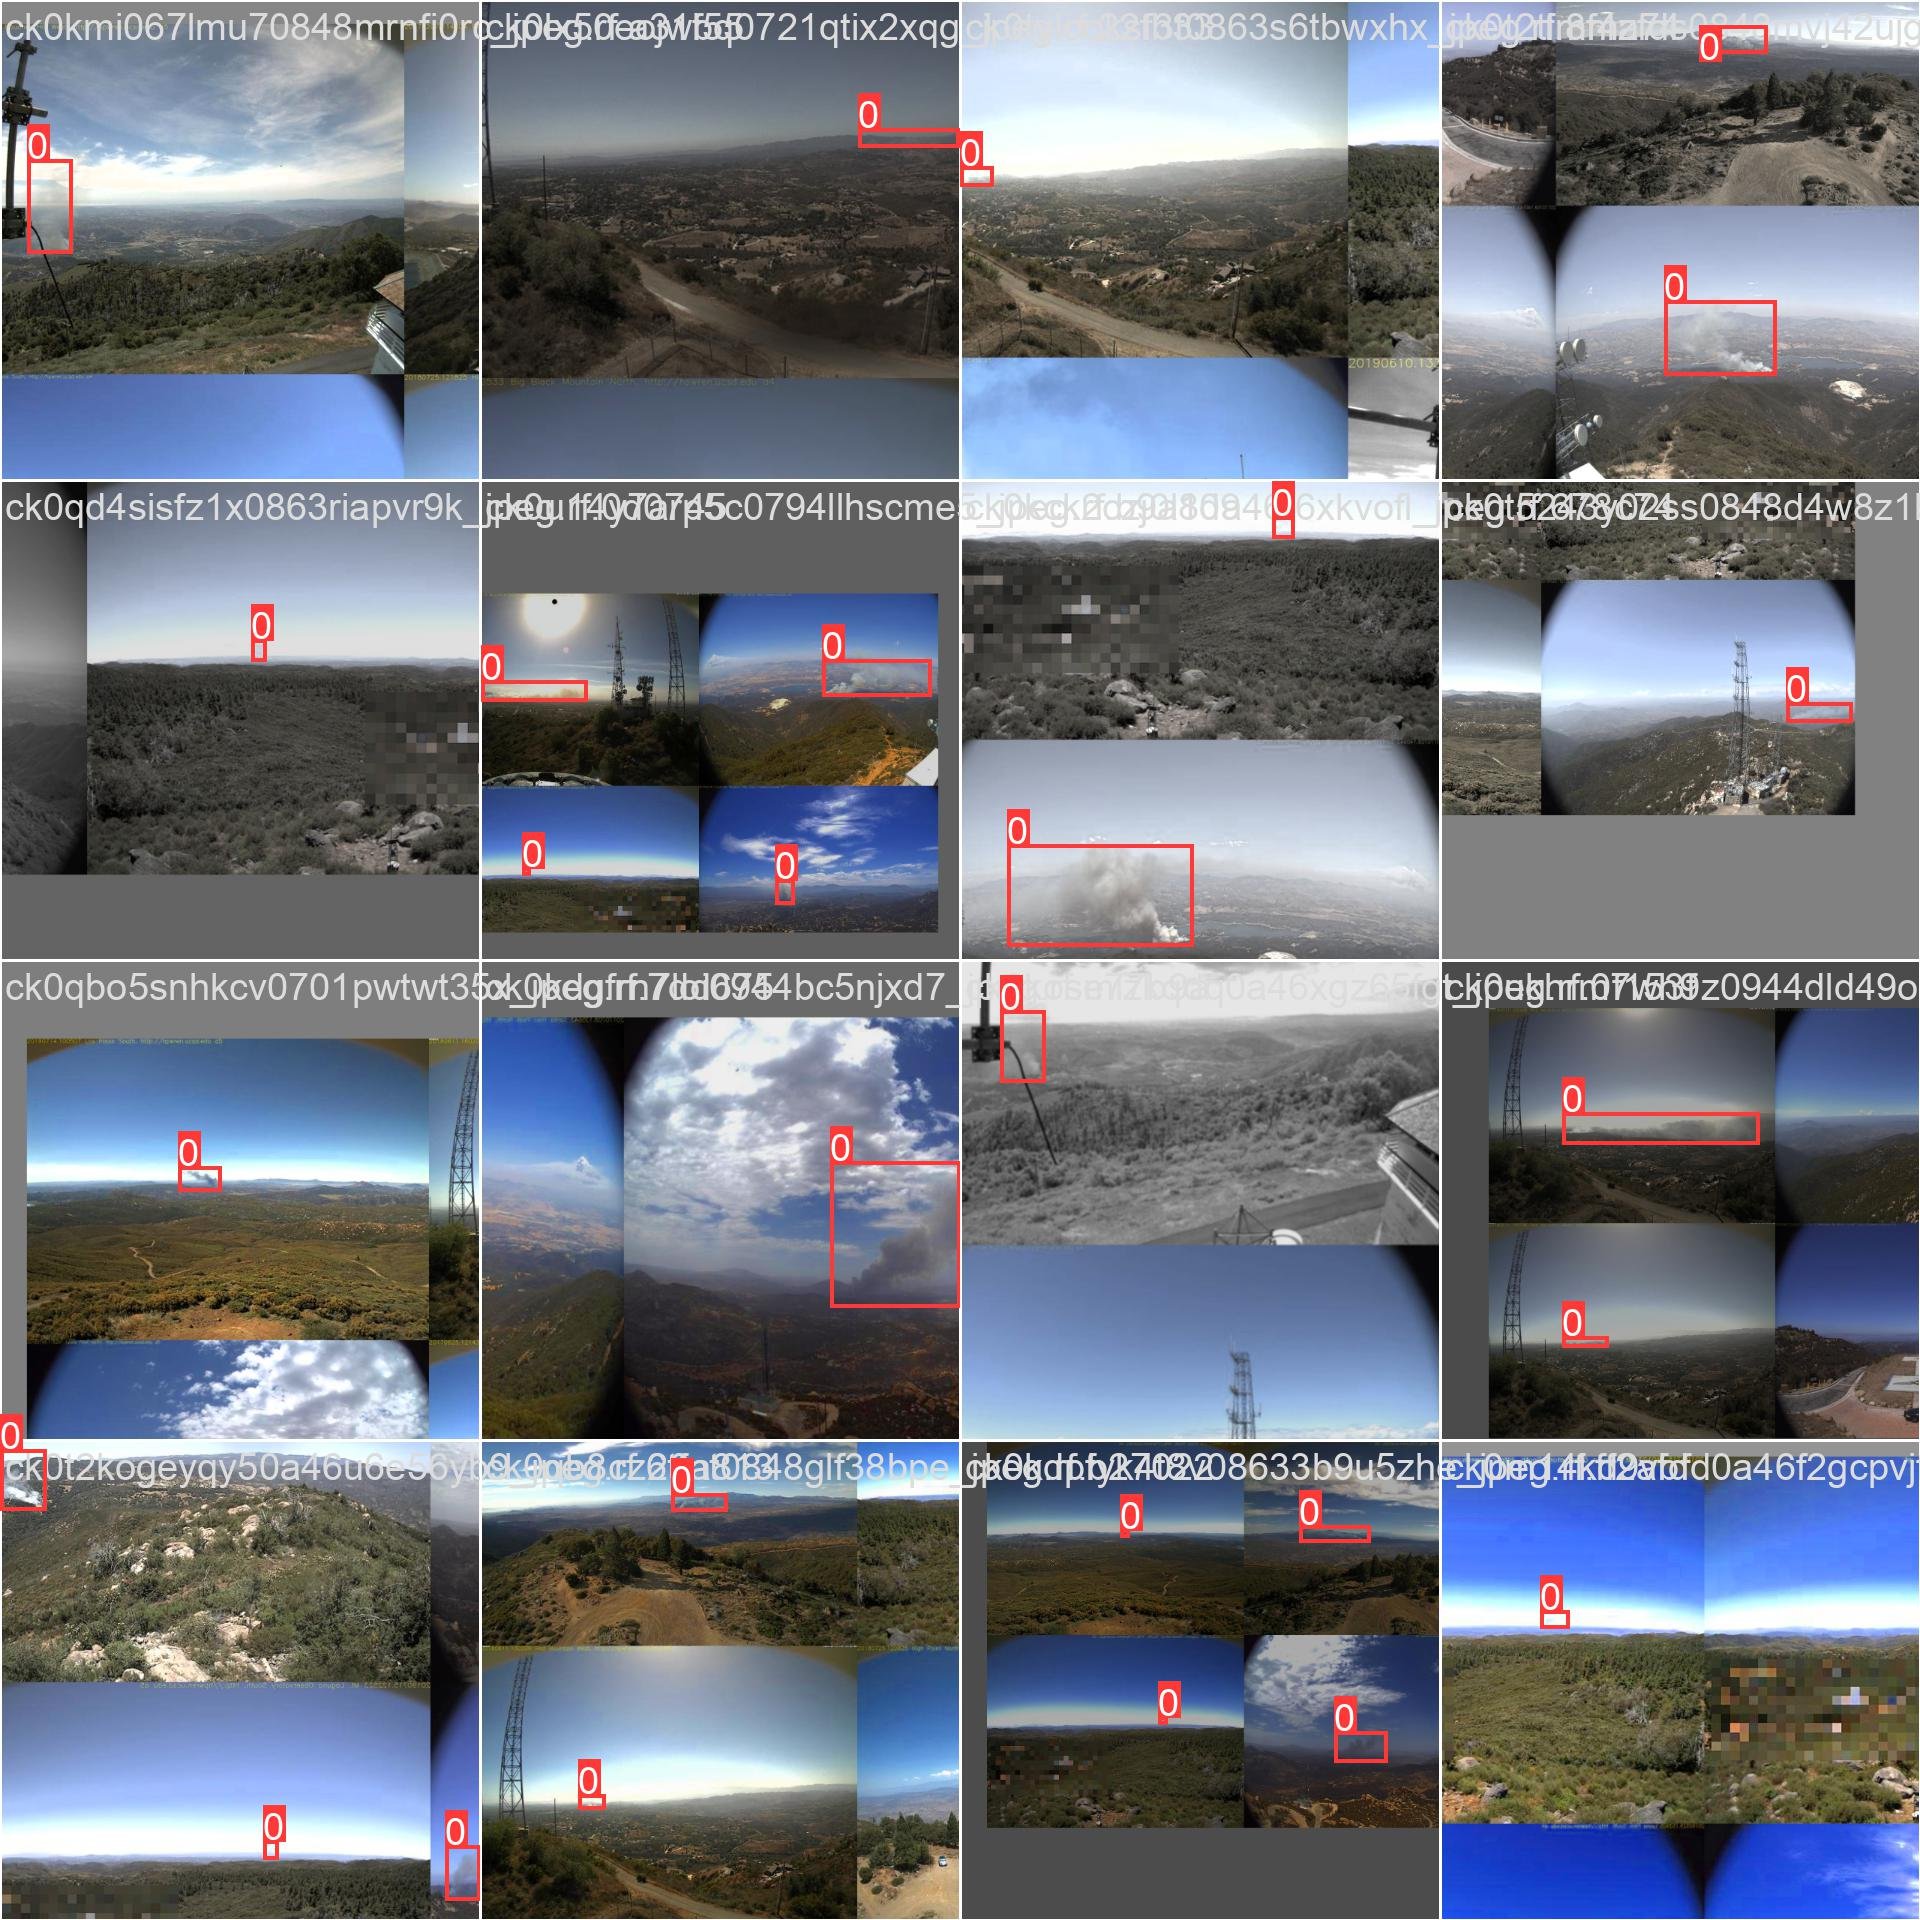

In [ ]:
Image(filename='runs/train/smoke_results/train_batch0.jpg', width=1000)

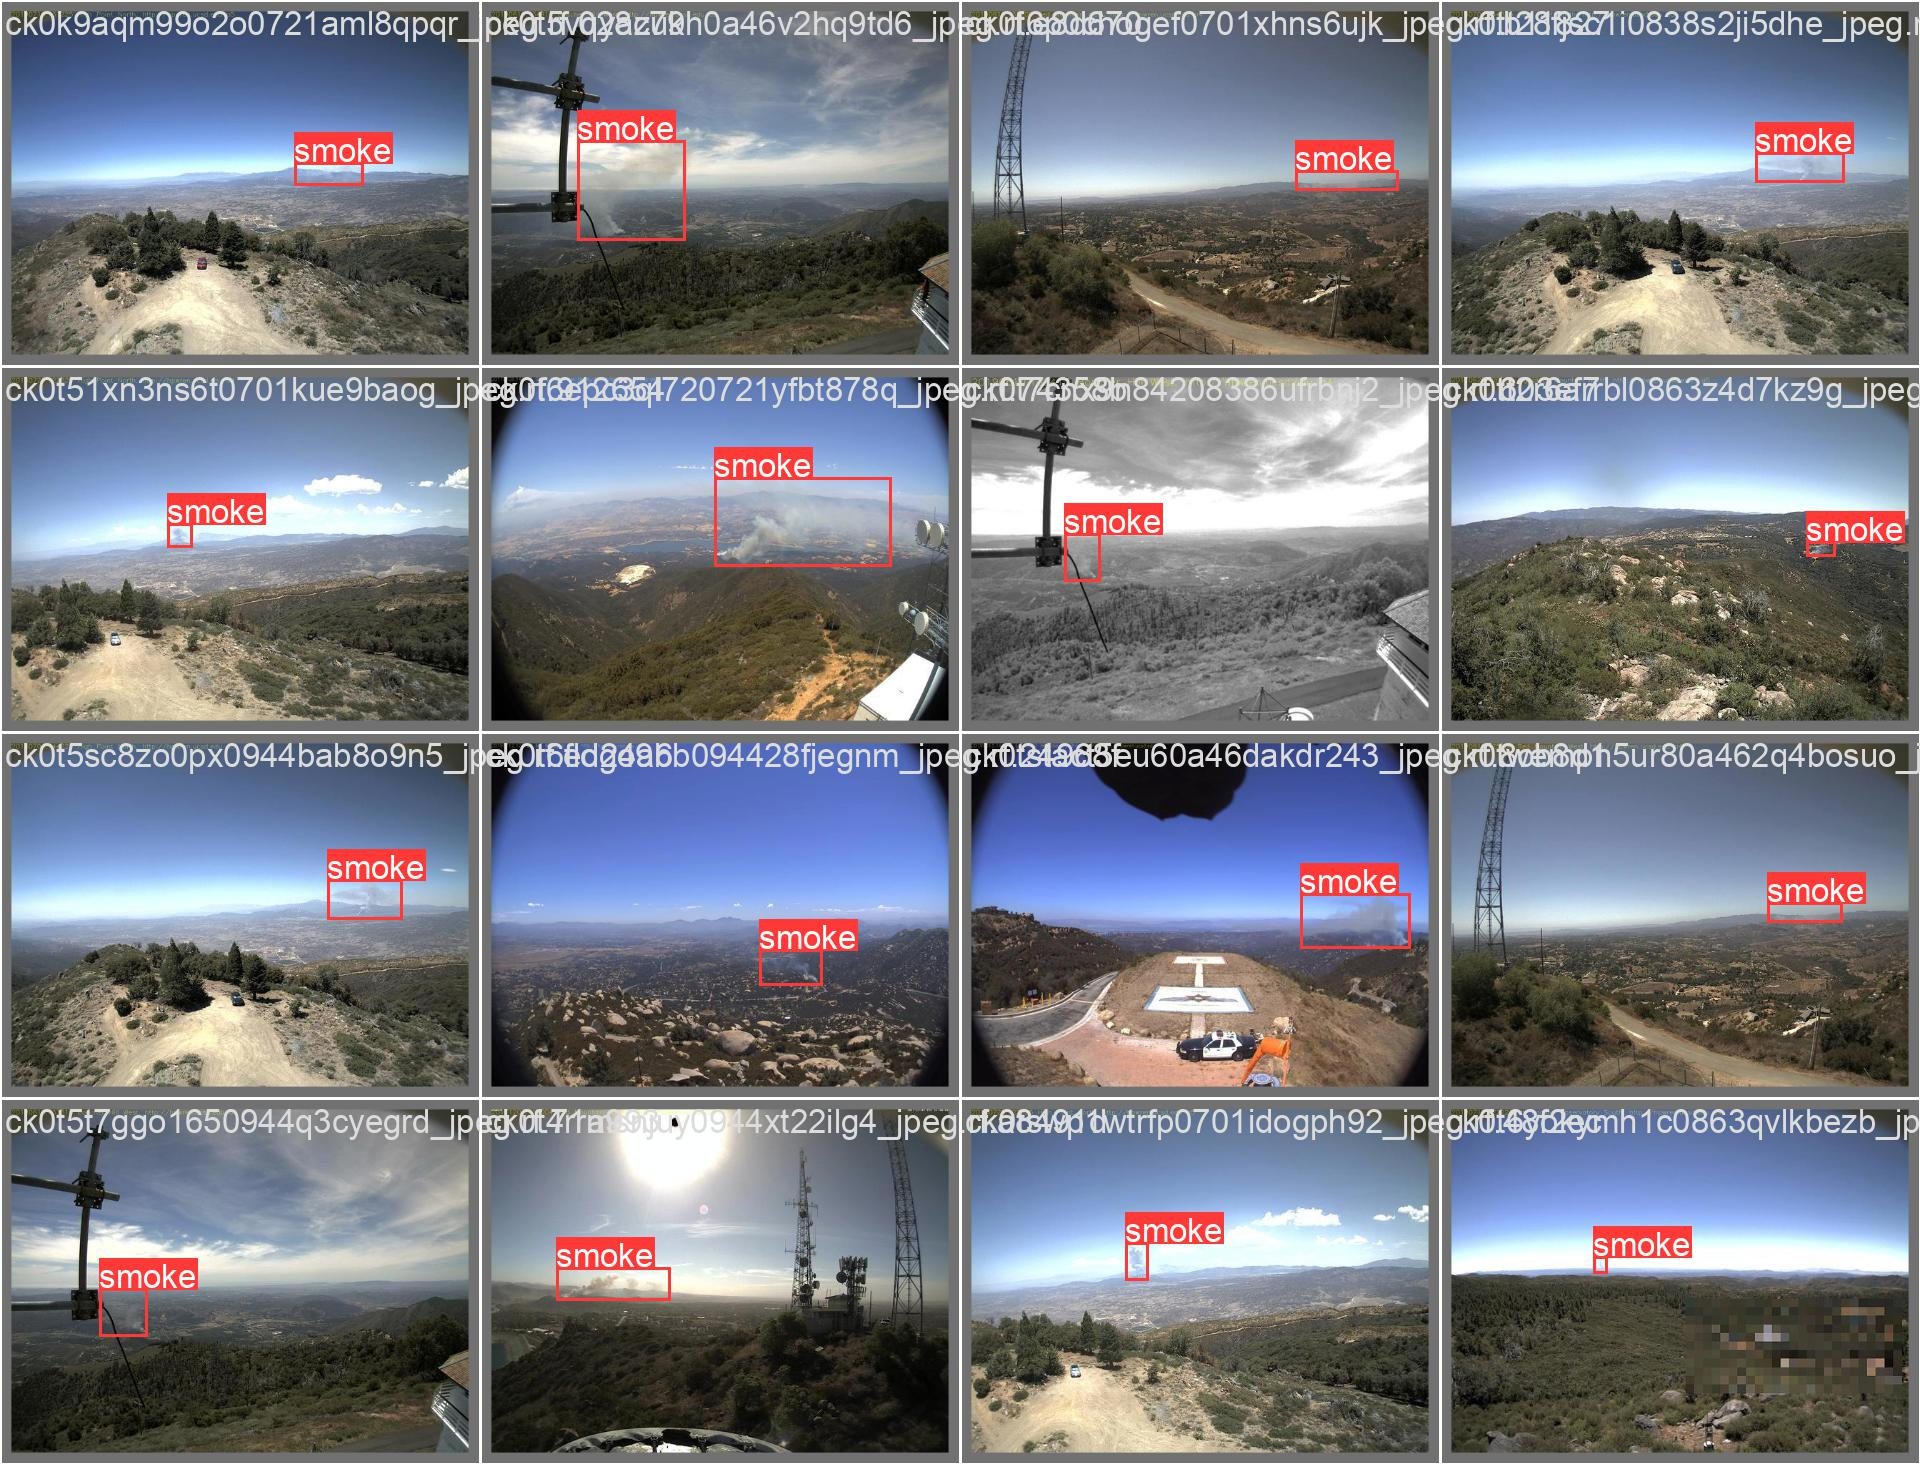

In [ ]:
Image(filename='runs/train/smoke_results/val_batch0_labels.jpg', width=1000)

### 검증(Validation)

In [ ]:
!python val.py --weights runs/train/smoke_results/weights/best.pt --data ./smoke/data.yaml --img 640 --iou 0.65 --half

val: data=./smoke/data.yaml, weights=['runs/train/smoke_results/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/yolov5/smoke/valid/labels.cache... 147 images, 0 backgrounds, 0 corrupt: 100% 147/147 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 5/5 [00:03<00:00,  1.37it/s]
                   all        147        147      0.892      0.902      0.906      0.491
Speed: 0.

In [ ]:
!python val.py --weights runs/train/smoke_results/weights/best.pt --data ./smoke/data.yaml --img 640 --task test

val: data=./smoke/data.yaml, weights=['runs/train/smoke_results/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/yolov5/smoke/test/labels... 74 images, 0 backgrounds, 0 corrupt: 100% 74/74 [00:00<00:00, 3092.77it/s]
test: New cache created: /content/yolov5/smoke/test/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 3/3 [00:02<00:00,  1.24it/s]
                   all         

### 추론(Inference)

In [ ]:
!python detect.py --weights runs/train/smoke_results/weights/best.pt --img 640 --conf 0.4 --source ./smoke/test/images

detect: weights=['runs/train/smoke_results/weights/best.pt'], source=./smoke/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/74 /content/yolov5/smoke/test/images/ck0kcoc8ik6ni0848clxs0vif_jpeg.rf.8b4629777ffe1d349cc970ee8af59eac.jpg: 480x640 1 smoke, 41.8ms
image 2/74 /content/yolov5/smoke/test/images/ck0kd4afx8g470701watkwxut_jpeg.rf.bb5a1f2c2b04

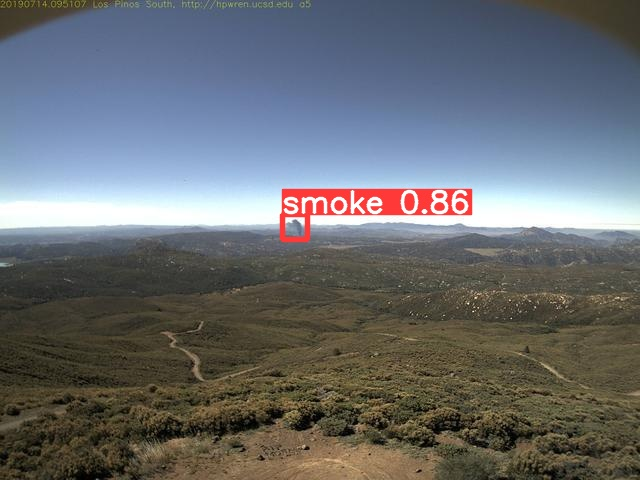

In [ ]:
import glob

image_name = random.choice(glob.glob('runs/detect/exp3/*.jpg'))
display(Image(filename=image_name))

### 모델 내보내기

In [ ]:
%mkdir /content/drive/My\ Drive/smoke/
%cp runs/train/smoke_results/weights/best.pt /content/drive/My\ Drive/smoke/